# Laboratorium 4 - Efekt Rungego

### Zadanie 1.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.interpolate as interpolate

sns.set_style("darkgrid")

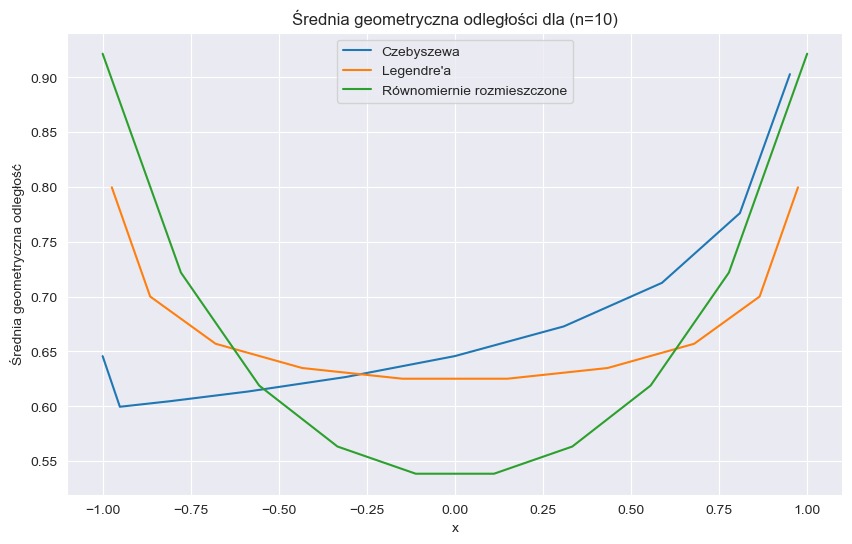

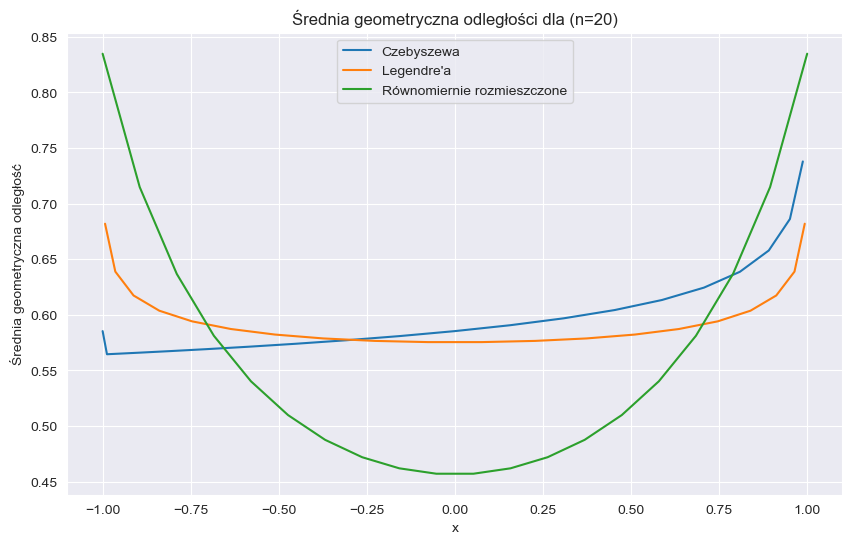

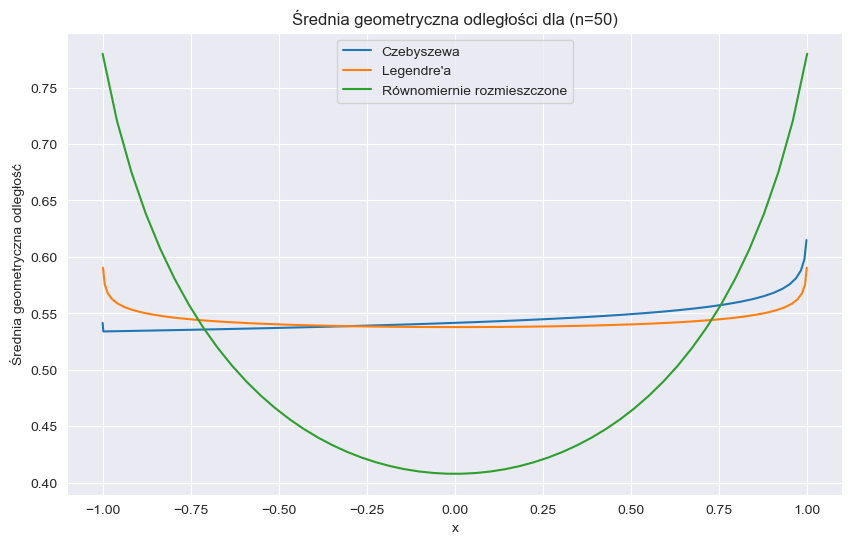

In [8]:
def geometric_mean_distances(points):
    n = len(points)
    distances = np.zeros(n)
    for i in range(n):
        point_distances = np.abs(points[i] - points)
        point_distances = point_distances[point_distances != 0]
        distances[i] = np.power(np.prod(point_distances), 1 / (n - 1))
    return distances


def plot_geometric_mean_distances(points, point_type, n):
    distances = geometric_mean_distances(points)
    plt.plot(points, distances)


n_values = [10, 20, 50]


for n in n_values:
    plt.figure(figsize=(10, 6))
    chebyshev_points = -np.cos((np.arange(n) / n) * np.pi)
    plot_geometric_mean_distances(chebyshev_points, "Czebyszewa", n)
    legendre_points = np.polynomial.legendre.leggauss(n)[0]
    plot_geometric_mean_distances(legendre_points, "Legendre'a", n)
    uniform_points = np.linspace(-1, 1, n)
    plot_geometric_mean_distances(uniform_points, "równomiernie rozmieszczone", n)
    plt.title(f"Średnia geometryczna odległości dla (n={n})")
    plt.xlabel("x")
    plt.ylabel("Średnia geometryczna odległość")
    plt.legend(["Czebyszewa", "Legendre'a", "Równomiernie rozmieszczone"])
    plt.show()


### Zadanie 2

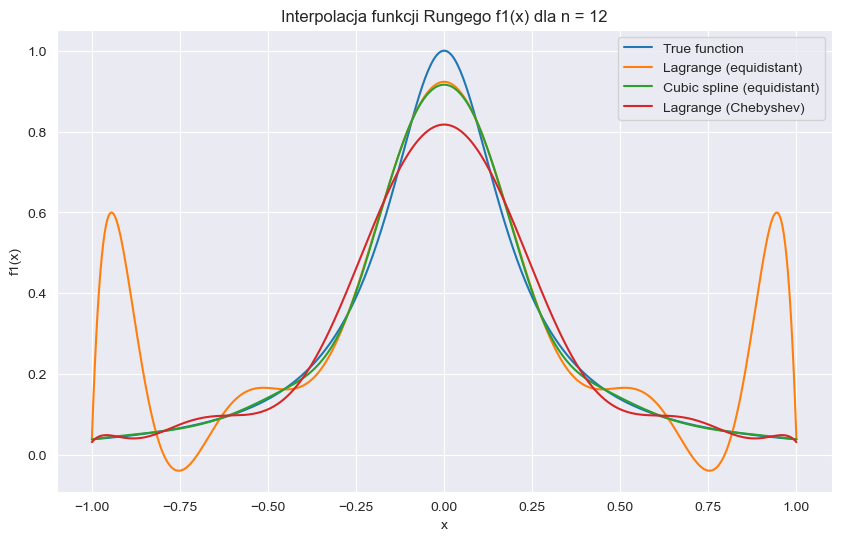

In [9]:
def f1(x):
    return 1 / (1 + 25 * x**2)


def f2(x):
    return np.exp(np.cos(x))


def chebyshev_nodes(n, a, b):
    j = np.arange(1, n + 1)
    theta = (2 * j - 1) * np.pi / (2 * n)
    x = 0.5 * (a + b) + 0.5 * (b - a) * np.cos(theta)
    return x


def lagrange_interpolation_equidistant(f, a, b, n, x_plot):
    x_nodes = np.linspace(a, b, n)
    y_nodes = f(x_nodes)
    poly = interpolate.lagrange(x_nodes, y_nodes)
    y_plot = poly(x_plot)
    return y_plot


def cubic_spline_interpolation_equidistant(f, a, b, n, x_plot):
    x_nodes = np.linspace(a, b, n)
    y_nodes = f(x_nodes)
    spline = interpolate.CubicSpline(x_nodes, y_nodes)
    y_plot = spline(x_plot)
    return y_plot


def lagrange_interpolation_chebyshev(f, a, b, n, x_plot):
    x_nodes = chebyshev_nodes(n, a, b)
    y_nodes = f(x_nodes)
    poly = interpolate.lagrange(x_nodes, y_nodes)
    y_plot = poly(x_plot)
    return y_plot


def plot_interpolation_runge(f, a, b, n):
    x_plot = np.linspace(a, b, 500)
    y_true = f(x_plot)

    y_lagrange_equidistant = lagrange_interpolation_equidistant(f, a, b, n, x_plot)
    y_spline_equidistant = cubic_spline_interpolation_equidistant(f, a, b, n, x_plot)
    y_lagrange_chebyshev = lagrange_interpolation_chebyshev(f, a, b, n, x_plot)

    plt.figure(figsize=(10, 6))
    plt.plot(x_plot, y_true, label="True function")
    plt.plot(x_plot, y_lagrange_equidistant, label="Lagrange (equidistant)")
    plt.plot(x_plot, y_spline_equidistant, label="Cubic spline (equidistant)")
    plt.plot(x_plot, y_lagrange_chebyshev, label="Lagrange (Chebyshev)")
    plt.legend()
    plt.title(f"Interpolacja funkcji Rungego f1(x) dla n = {n}")
    plt.xlabel("x")
    plt.ylabel("f1(x)")
    plt.grid(True)
    plt.show()


n = 12
plot_interpolation_runge(f1, -1, 1, n)

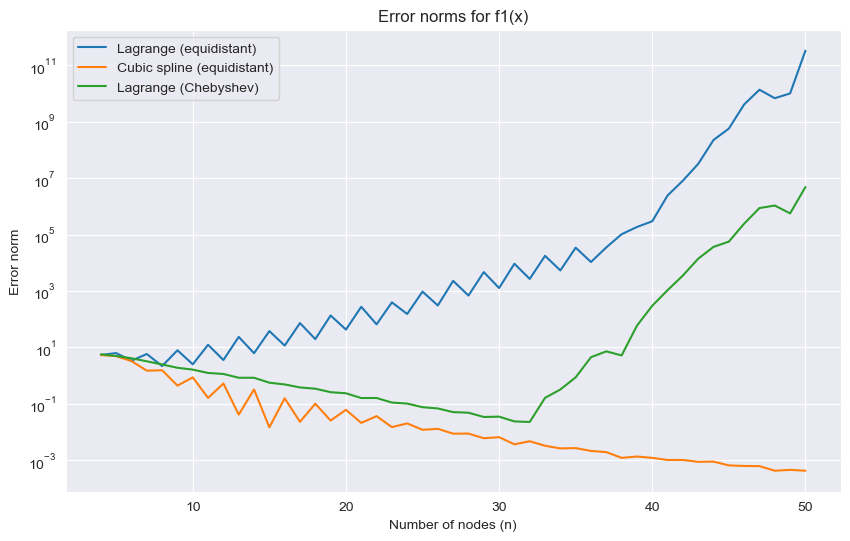

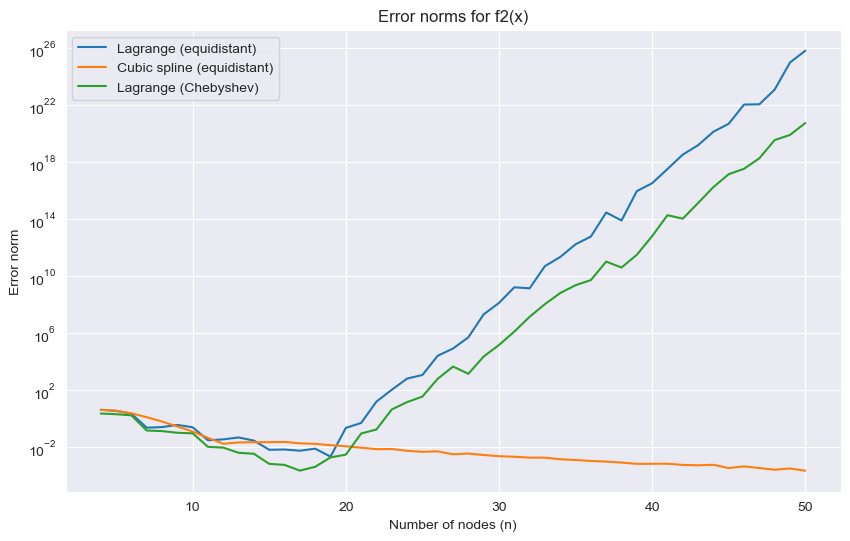

In [10]:
def calculate_error_norm(f, a, b, n_values, num_points=500):
    error_norms_lagrange_equidistant = []
    error_norms_spline_equidistant = []
    error_norms_lagrange_chebyshev = []

    for n in n_values:
        x_plot = np.random.uniform(a, b, num_points)
        y_true = f(x_plot)

        y_lagrange_equidistant = lagrange_interpolation_equidistant(f, a, b, n, x_plot)
        y_spline_equidistant = cubic_spline_interpolation_equidistant(
            f, a, b, n, x_plot
        )
        y_lagrange_chebyshev = lagrange_interpolation_chebyshev(f, a, b, n, x_plot)

        error_norms_lagrange_equidistant.append(
            np.linalg.norm(y_true - y_lagrange_equidistant)
        )
        error_norms_spline_equidistant.append(
            np.linalg.norm(y_true - y_spline_equidistant)
        )
        error_norms_lagrange_chebyshev.append(
            np.linalg.norm(y_true - y_lagrange_chebyshev)
        )

    return (
        error_norms_lagrange_equidistant,
        error_norms_spline_equidistant,
        error_norms_lagrange_chebyshev,
    )


def plot_error_norms(
    n_values,
    error_norms_lagrange_equidistant,
    error_norms_spline_equidistant,
    error_norms_lagrange_chebyshev,
    title,
):
    plt.figure(figsize=(10, 6))
    plt.semilogy(
        n_values, error_norms_lagrange_equidistant, label="Lagrange (equidistant)"
    )
    plt.semilogy(
        n_values, error_norms_spline_equidistant, label="Cubic spline (equidistant)"
    )
    plt.plot(n_values, error_norms_lagrange_chebyshev, label="Lagrange (Chebyshev)")
    plt.xlabel("Number of nodes (n)")
    plt.ylabel("Error norm")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


n_values = np.arange(4, 51)
num_points = 500


error_norms_f1 = calculate_error_norm(f1, -1, 1, n_values, num_points)
plot_error_norms(n_values, *error_norms_f1, "Error norms for f1(x)")


error_norms_f2 = calculate_error_norm(f2, 0, 2 * np.pi, n_values, num_points)
plot_error_norms(n_values, *error_norms_f2, "Error norms for f2(x)")